In [ ]:
import math, time, random, datetime

# data analysis and wrangling
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

#import for interactive plotting
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

%matplotlib inline
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')

In [ ]:

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler


In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# machine learning
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron,SGDClassifier,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold, GridSearchCV, learning_curve, cross_val_score
from catboost import CatBoostClassifier, Pool, cv
# ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.shape

(1470, 35)

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.info

<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

In [ ]:
#check unique values in the column
print(df.apply(lambda col: col.unique().sum()))

Age                                                                      1677
Attrition                                                               YesNo
BusinessTravel                       Travel_RarelyTravel_FrequentlyNon-Travel
DailyRate                                                              710161
Department                         SalesResearch & DevelopmentHuman Resources
DistanceFromHome                                                          435
Education                                                                  15
EducationField              Life SciencesOtherMedicalMarketingTechnical De...
EmployeeCount                                                               1
EmployeeNumber                                                        1506552
EnvironmentSatisfaction                                                    10
Gender                                                             FemaleMale
HourlyRate                                                      

In [ ]:
leave = df['Attrition'][df['Attrition']=='Yes']
leave = len(leave)
stay = df['Attrition'][df['Attrition']=='No']
stay = len(stay)
labels = ['Leave', 'Stay']
Attrition = [leave, stay]
explode = [0, 0.1]
palette_color = sns.color_palette('Accent')

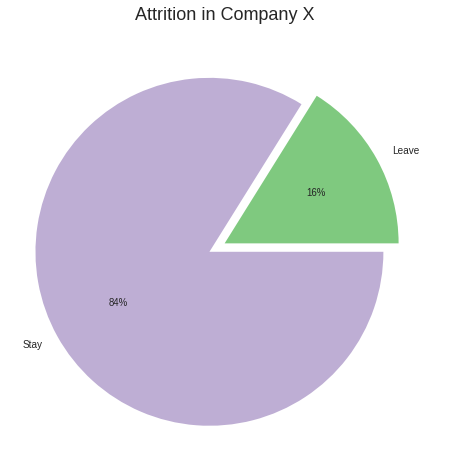

In [ ]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.set_context('paper')
plt.style.use('seaborn')

plt.pie(Attrition, labels=labels, colors=palette_color,
        explode=explode, autopct='%.0f%%')

plt.title('Attrition in Company X', fontsize=18)

plt.show()

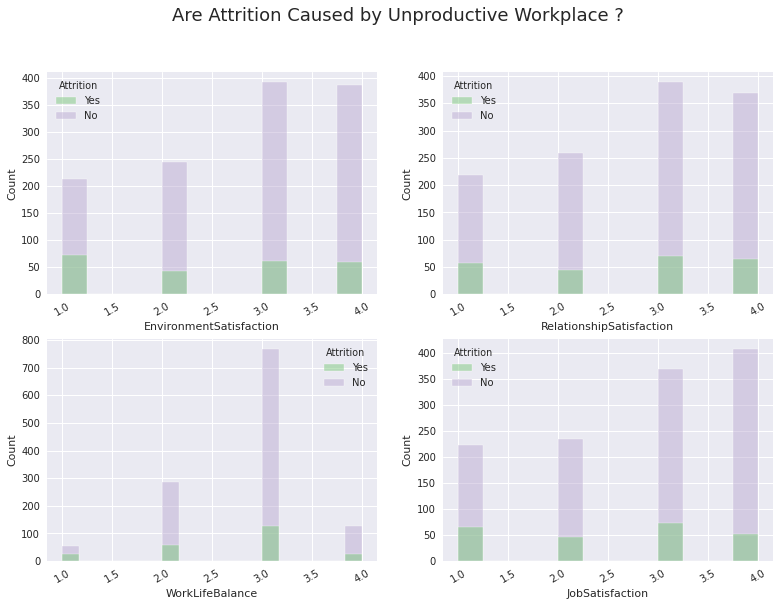

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(13, 9))
plt.suptitle('Are Attrition Caused by Unproductive Workplace ?', fontsize= 18)
sns.set_style('darkgrid')

ax1 = sns.histplot(x='EnvironmentSatisfaction', hue = 'Attrition', data=df, ax=axs[0, 0], palette='Accent')
ax2 = sns.histplot(x='RelationshipSatisfaction', hue = 'Attrition', data=df, ax=axs[0, 1], palette='Accent')
ax3 = sns.histplot(x='WorkLifeBalance', hue = 'Attrition', data=df, ax=axs[1, 0], palette='Accent')
ax4 = sns.histplot(x='JobSatisfaction', hue = 'Attrition', data=df, ax=axs[1, 1], palette='Accent')

for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 30)
    
plt.show()

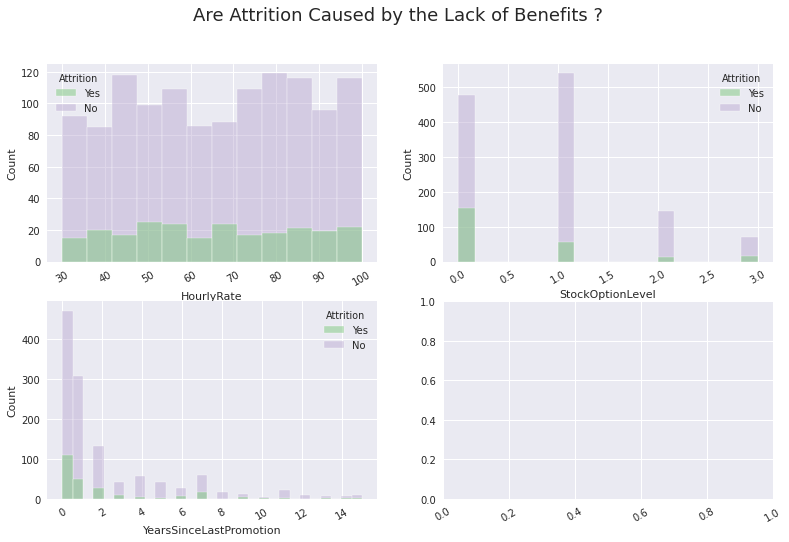

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(13, 8))
plt.suptitle('Are Attrition Caused by the Lack of Benefits ?', fontsize= 18)
sns.set_style('darkgrid')

ax1 = sns.histplot(x='HourlyRate', hue = 'Attrition', data=df, ax=axs[0, 0], palette='Accent')
ax2 = sns.histplot(x='StockOptionLevel', hue = 'Attrition', data=df, ax=axs[0, 1], palette='Accent')
ax3 = sns.histplot(x='YearsSinceLastPromotion', hue = 'Attrition', data=df, ax=axs[1, 0], palette='Accent')

for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 30)
    
plt.show()

In [ ]:
# drop the unnecessary columns
df.drop(['EmployeeNumber','Over18','StandardHours','EmployeeCount'],axis=1,inplace=True)


In [ ]:
df['Attrition'] = df['Attrition'].apply(lambda x:1 if x == "Yes" else 0 )
df['OverTime'] = df['OverTime'].apply(lambda x:1 if x =="Yes" else 0 )

In [ ]:
attrition = df[df['Attrition'] == 1]
no_attrition = df[df['Attrition']==0]

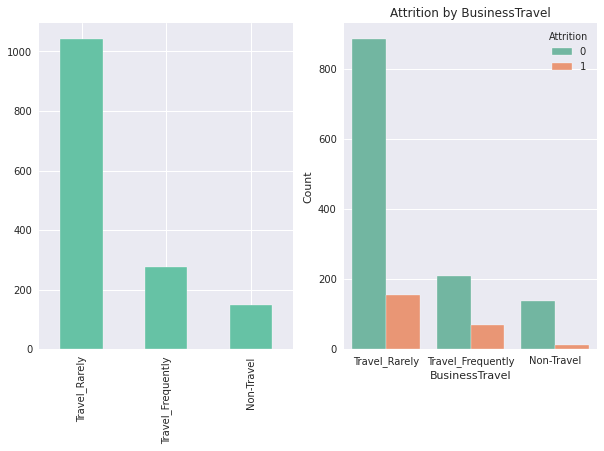

In [ ]:
def categorical_column_viz(col_name):
    
    f,ax = plt.subplots(1,2, figsize=(10,6))
  
    # Count Plot
    df[col_name].value_counts().plot.bar(cmap='Set2',ax=ax[0])
    ax[1].set_title(f'Number of Employee by {col_name}')
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(f'{col_name}')
    
    # Attrition Count per factors
    sns.countplot(col_name, hue='Attrition',data=df, ax=ax[1], palette='Set2')
    ax[1].set_title(f'Attrition by {col_name}')
    ax[1].set_xlabel(f'{col_name}')
    ax[1].set_ylabel('Count')
categorical_column_viz('BusinessTravel')

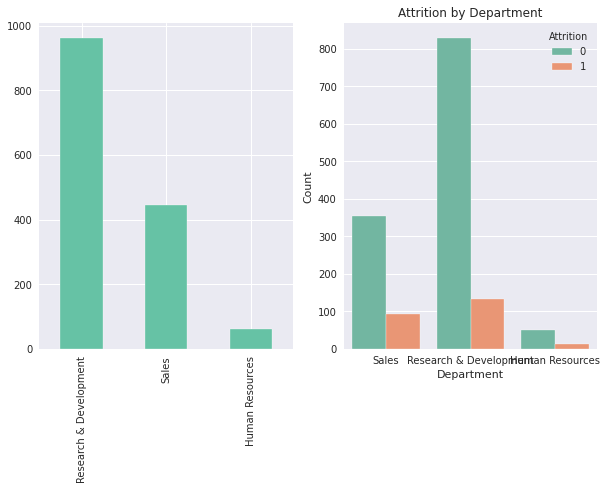

In [ ]:
categorical_column_viz('Department')

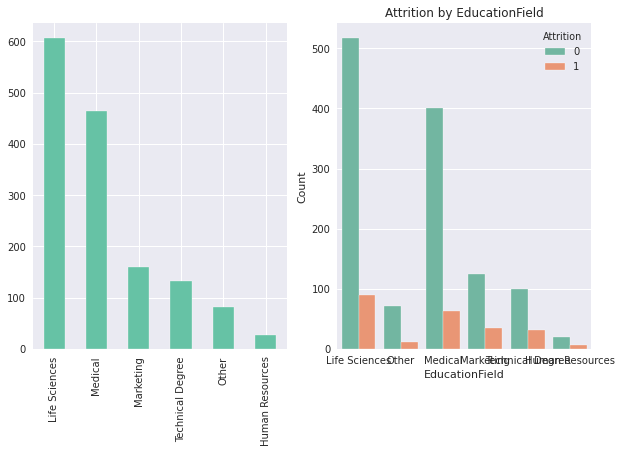

In [ ]:
categorical_column_viz('EducationField')

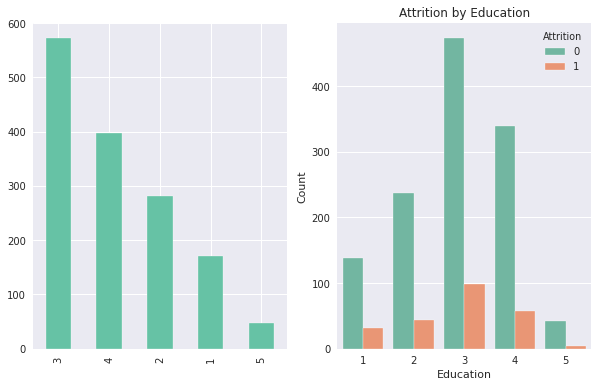

In [ ]:
categorical_column_viz('Education')

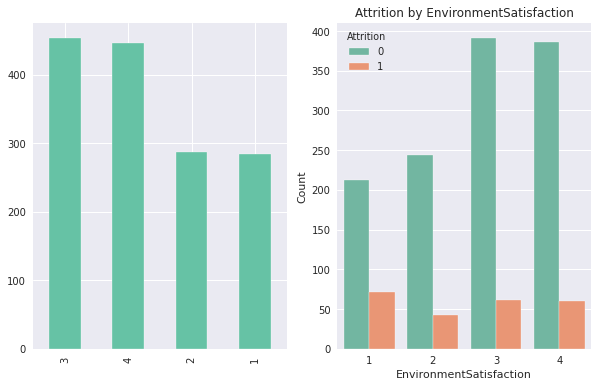

In [ ]:
categorical_column_viz('EnvironmentSatisfaction')

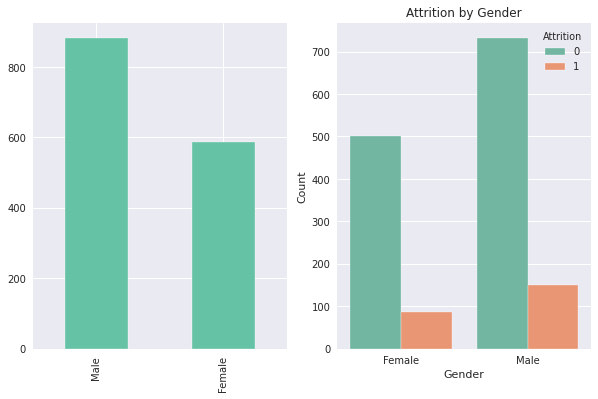

In [ ]:
categorical_column_viz('Gender')

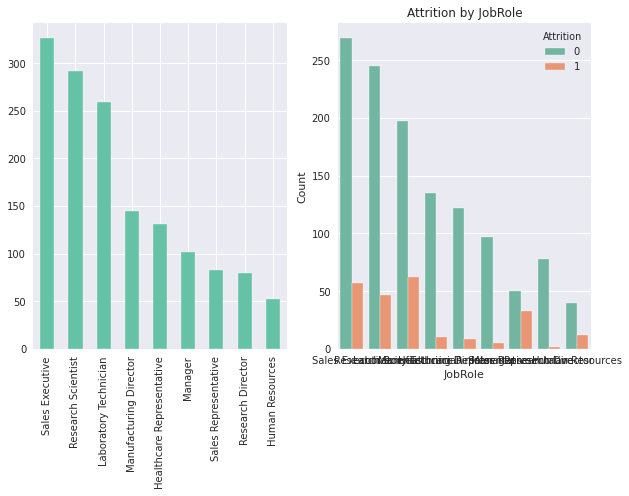

In [ ]:
categorical_column_viz('JobRole')

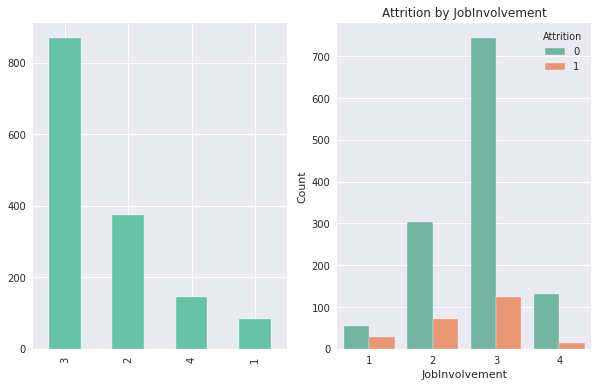

In [ ]:
categorical_column_viz('JobInvolvement')

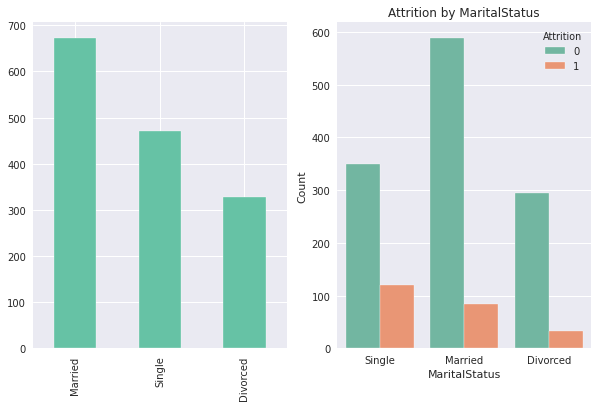

In [ ]:
categorical_column_viz('MaritalStatus')

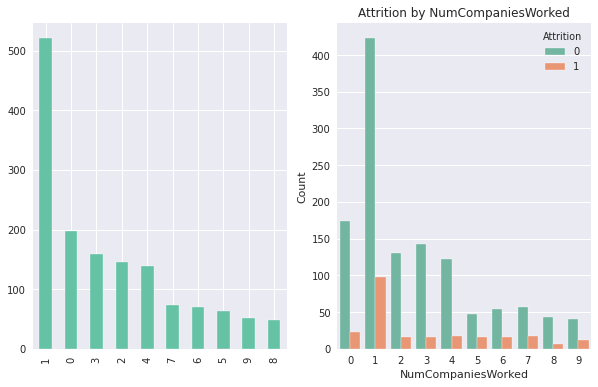

In [ ]:
categorical_column_viz('NumCompaniesWorked')

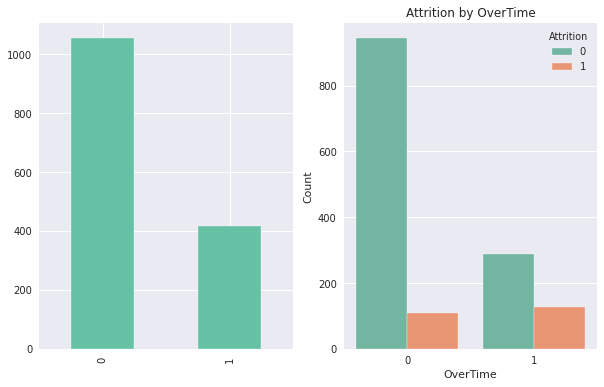

In [ ]:
categorical_column_viz('OverTime')

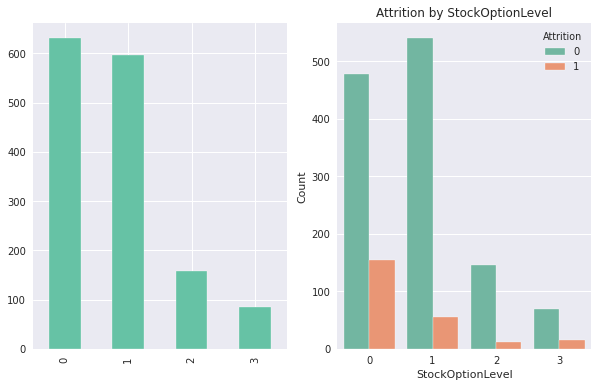

In [ ]:
categorical_column_viz('StockOptionLevel')

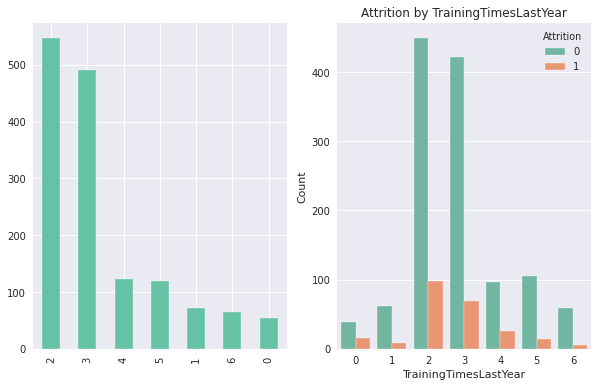

In [ ]:
categorical_column_viz('TrainingTimesLastYear')

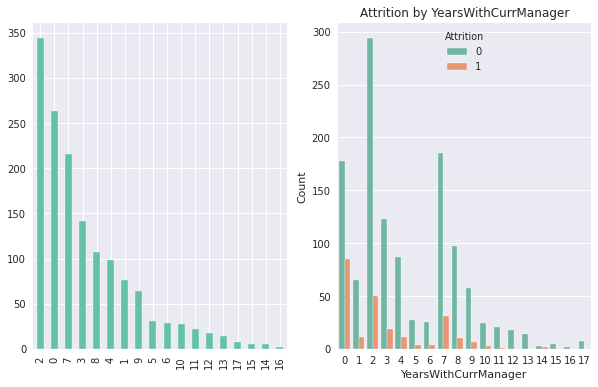

In [ ]:
categorical_column_viz('YearsWithCurrManager')